
# Phân tích KPI Mạng Di động (15 Mins)



In [11]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Cấu hình để biểu đồ hiển thị ngay trong notebook
%matplotlib inline
# Cấu hình hiển thị cho Pandas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print("Các thư viện đã được tải thành công.")

Các thư viện đã được tải thành công.


In [12]:
# --- Cell 2 (Sửa lỗi): Tải dữ liệu với header=0 ---
# Tên file
file_name = 'D://vhproj\power-saving\data\data_3_months.csv'

try:
    # header=0 bảo Pandas đọc hàng đầu tiên (index 0) làm tiêu đề.
    # Chúng ta không cần 'names=column_names' nữa vì tên đã có trong file.
    df = pd.read_csv(file_name, header=0)

    print(f"Đã tải file '{file_name}' thành công (sử dụng hàng 0 làm tiêu đề).")
    print("5 dòng dữ liệu đầu tiên:")
    print(df.head())
    print("\nKiểm tra kiểu dữ liệu (dtypes) sau khi tải:")
    print(df.info()) # Kiểm tra xem các cột số có phải là float/int không

except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file '{file_name}'.")
except Exception as e:
    print(f"Đã xảy ra lỗi khi đọc file: {e}")

Đã tải file 'D://vhproj\power-saving\data\data_3_months.csv' thành công (sử dụng hàng 0 làm tiêu đề).
5 dòng dữ liệu đầu tiên:
  update_time   enodeb      cell_name  ps_traffic_mb  avg_rrc_connected_user  prb_dl_used  prb_dl_available_total      date_hour
0     45:00.0  enodebF     enodebF121         867.34               12.866667        137.5                    15.0  2025-10-31-18
1     45:00.0  enodebF     enodebF112         590.75               22.455556        127.5                    15.0  2025-10-31-18
2     45:00.0  enodebG       enodebG1         916.76               19.005556        297.5                    15.0  2025-10-31-18
3     45:00.0  enodebG  enodebG21B012           0.00                0.000000         67.5                    15.0  2025-10-31-18
4     45:00.0  enodebG       enodebG7          69.88                2.083334         87.5                    15.0  2025-10-31-18

Kiểm tra kiểu dữ liệu (dtypes) sau khi tải:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048

In [13]:
# --- Cell 3: Kiểm tra dữ liệu ban đầu ---
if 'df' in locals():
    print("\n--- Thông tin DataFrame (df.info()) ---")
    # df.info() cho thấy kiểu dữ liệu và các giá trị không rỗng (non-null)
    df.info()

    print("\n--- Thống kê mô tả (df.describe()) ---")
    # df.describe() cung cấp thống kê tóm tắt cho các cột số
    print(df.describe())

#


--- Thông tin DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   update_time             1048575 non-null  object 
 1   enodeb                  1048575 non-null  object 
 2   cell_name               1048575 non-null  object 
 3   ps_traffic_mb           1048459 non-null  float64
 4   avg_rrc_connected_user  1048575 non-null  float64
 5   prb_dl_used             1047327 non-null  float64
 6   prb_dl_available_total  1047327 non-null  float64
 7   date_hour               1048575 non-null  object 
dtypes: float64(4), object(4)
memory usage: 64.0+ MB

--- Thống kê mô tả (df.describe()) ---
       ps_traffic_mb  avg_rrc_connected_user   prb_dl_used  prb_dl_available_total
count   1.048459e+06            1.048575e+06  1.047327e+06            1.047327e+06
mean    5.194585e+02            1.3741

In [14]:
# --- Cell 4 (Làm sạch dữ liệu và Kỹ thuật đặc trưng ---
if 'df' in locals():
    print("Bắt đầu làm sạch dữ liệu và kỹ thuật đặc trưng...")

    try:
        # 1. Kết hợp `date_hour` và `update_time` thành một cột datetime đầy đủ
        df['minute_str'] = df['update_time'].str.split(':').str[0].str.strip()
        df['full_datetime_str'] = df['date_hour'].str.strip() + '-' + df['minute_str']

       
        # 5 giá trị đầu tiên 
        print("\n--- 5 giá trị 'full_datetime_str' đầu tiên để kiểm tra format: ---")
        print(df['full_datetime_str'].head(5))
        # 2. Chuyển đổi chuỗi kết hợp thành đối tượng datetime
        # Nó phải khớp 100% với output ở trên
        my_format = '%Y-%m-%d-%H-%M' 
        df['timestamp'] = pd.to_datetime(df['full_datetime_str'], format=my_format, errors='coerce')

        # 3. Xử lý các dòng bị lỗi (NaT)
        if df['timestamp'].isnull().any():
            invalid_rows = df['timestamp'].isnull().sum()
            print(f"PHÁT HIỆN: {invalid_rows} dòng có định dạng thời gian không hợp lệ. Đang loại bỏ...")
            df = df.dropna(subset=['timestamp'])

        if df.empty:
            print(f"LỖI: Toàn bộ dữ liệu đã bị loại bỏ.")
            print(f"Định dạng bạn dùng ('{my_format}') có thể KHÔNG KHỚP với dữ liệu.")
            print("Hãy so sánh nó với 5 giá trị đã in ở trên.")
        else:
            # 4. Đặt 'timestamp' làm chỉ mục (index) của DataFrame
            df = df.set_index('timestamp')

            # 5. Tạo KPI mới 'prb_utilization'
            print("Tạo KPI mới 'prb_utilization'...")
            df['prb_available_clean'] = df['prb_dl_available_total'].replace(0, np.nan)
            df['prb_utilization'] = (df['prb_dl_used'] / df['prb_available_clean']) * 100
            df['prb_utilization'] = df['prb_utilization'].fillna(0)
            # 6. Bỏ các cột tạm thời
            columns_to_drop = ['update_time', 'date_hour', 'minute_str', 'full_datetime_str', 'prb_available_clean']
            df = df.drop(columns=columns_to_drop)
            print("\nHoàn tất làm sạch dữ liệu.")
            print("\nThông tin DataFrame sau khi làm sạch:")
            df.info()

    except Exception as e:
        print(f"Đã xảy ra lỗi nghiêm trọng trong quá trình làm sạch: {e}")
else:
    print("Lỗi: DataFrame 'df' không tồn tại. Vui lòng chạy lại Cell 2 để tải dữ liệu.")

Bắt đầu làm sạch dữ liệu và kỹ thuật đặc trưng...

--- 5 giá trị 'full_datetime_str' đầu tiên để kiểm tra format: ---
0    2025-10-31-18-45
1    2025-10-31-18-45
2    2025-10-31-18-45
3    2025-10-31-18-45
4    2025-10-31-18-45
Name: full_datetime_str, dtype: object
Tạo KPI mới 'prb_utilization'...

Hoàn tất làm sạch dữ liệu.

Thông tin DataFrame sau khi làm sạch:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2025-10-31 18:45:00 to 2025-07-10 19:30:00
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   enodeb                  1048575 non-null  object 
 1   cell_name               1048575 non-null  object 
 2   ps_traffic_mb           1048459 non-null  float64
 3   avg_rrc_connected_user  1048575 non-null  float64
 4   prb_dl_used             1047327 non-null  float64
 5   prb_dl_available_total  1047327 non-null  float64
 6   prb_utilization         1048575 non-null  f

Tạo biểu đồ chuỗi thời gian theo giờ...


C:\Users\firek\AppData\Local\Temp\ipykernel_24292\3873710709.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').agg({


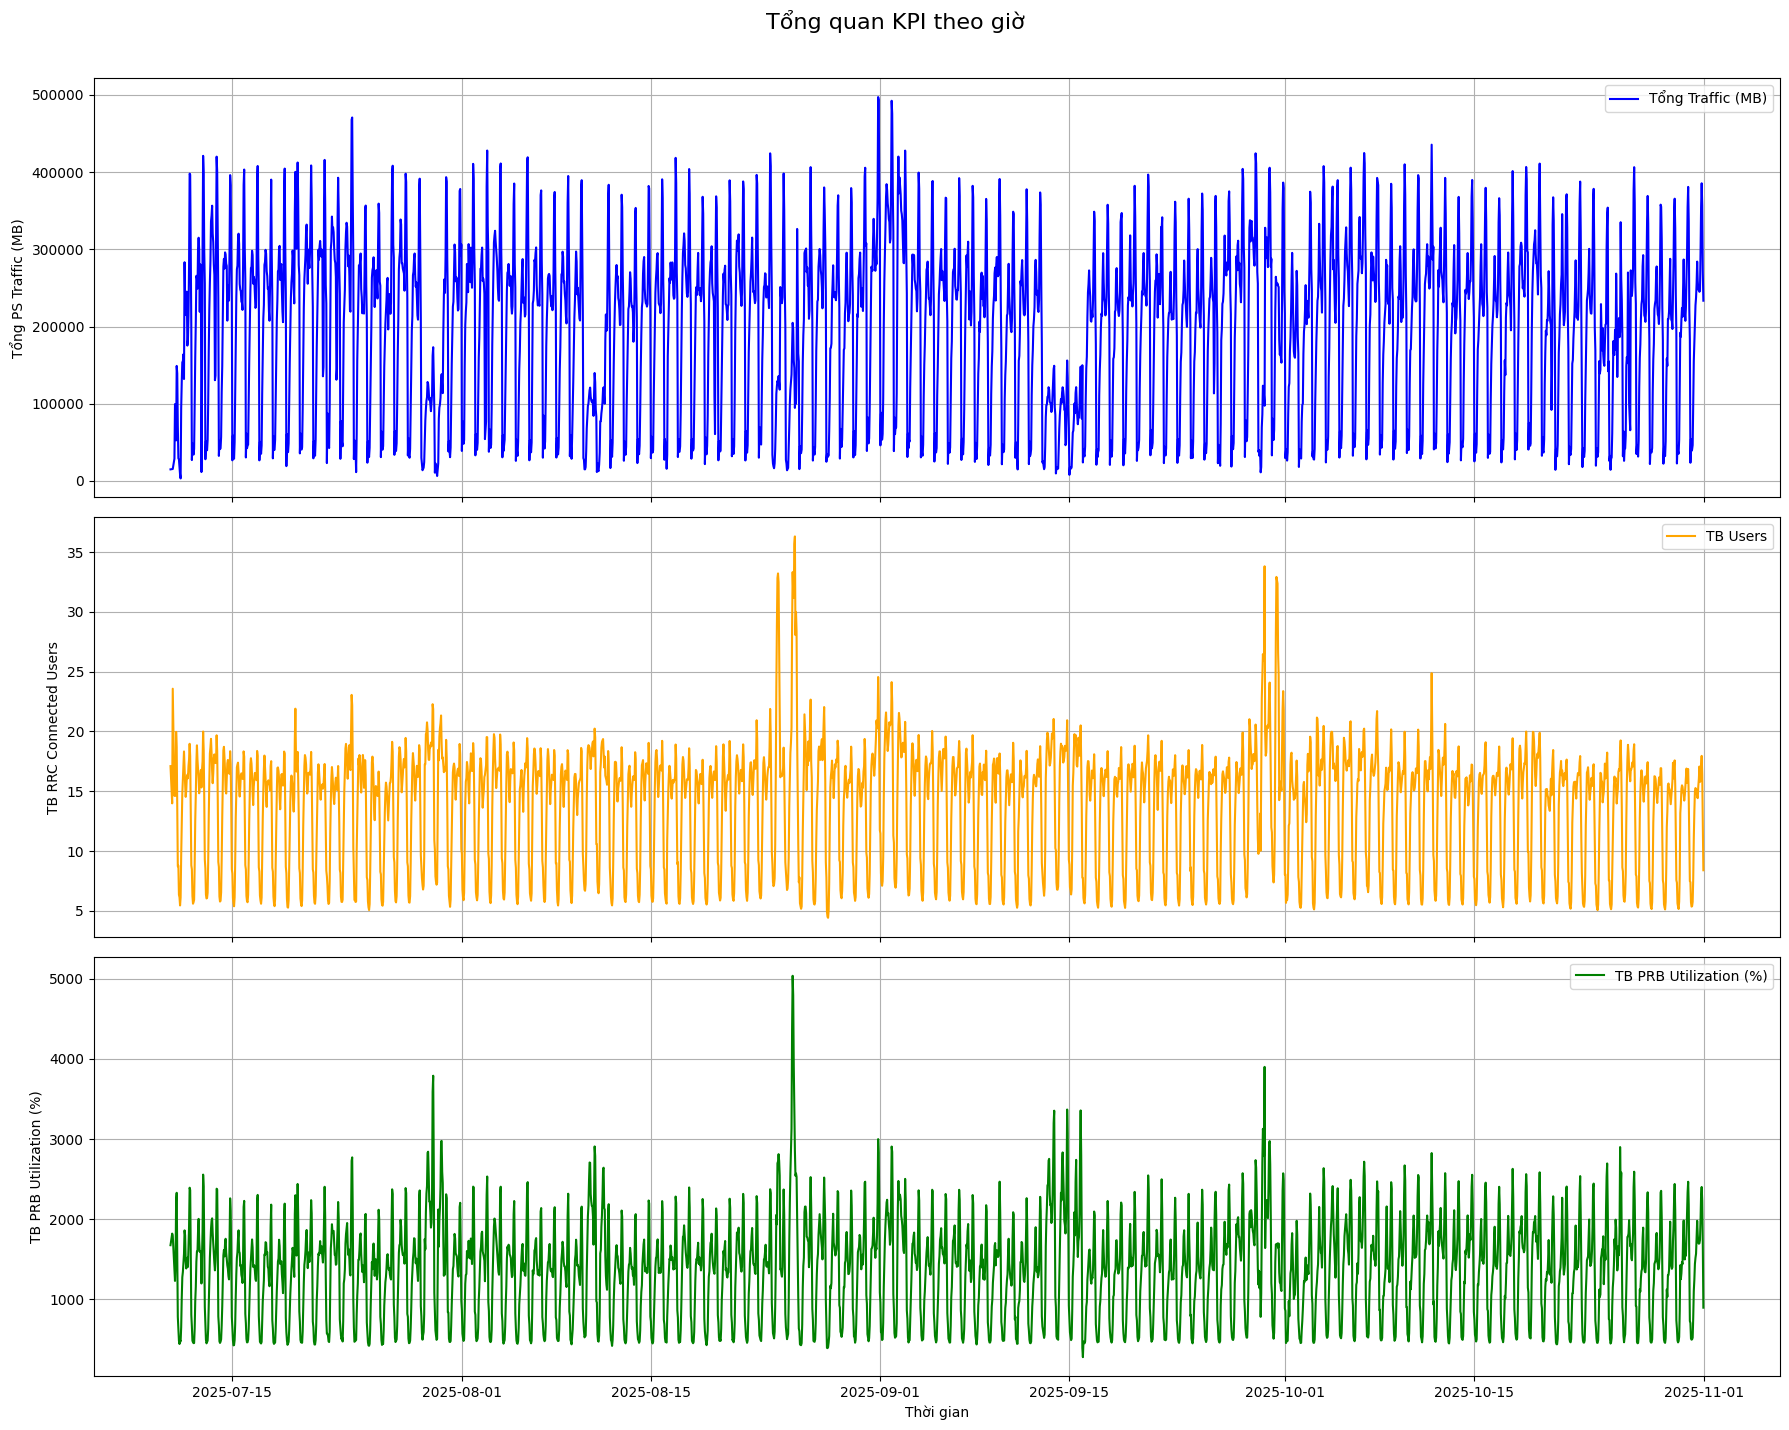

In [15]:
# --- Cell 5: Phân tích chuỗi thời gian (Tổng quan) ---
# Chúng ta sẽ tổng hợp dữ liệu theo giờ để xem xu hướng tổng thể
if 'df' in locals():
    print("Tạo biểu đồ chuỗi thời gian theo giờ...")

    # 'H' = resample by Hour (lấy mẫu lại theo giờ)
    # .sum() cho traffic, .mean() cho users và utilization
    df_hourly = df.resample('H').agg({
        'ps_traffic_mb': 'sum',
        'avg_rrc_connected_user': 'mean',
        'prb_utilization': 'mean'
    })
    # Bỏ các giờ không có dữ liệu (nếu có)
    df_hourly = df_hourly[df_hourly['ps_traffic_mb'] > 0]
    # Vẽ 3 biểu đồ
    fig, axes = plt.subplots(3, 1, figsize=(18, 15), sharex=True)
    fig.suptitle('Tổng quan KPI theo giờ', fontsize=16)
    # Biểu đồ 1: PS Traffic
    axes[0].plot(df_hourly.index, df_hourly['ps_traffic_mb'], label='Tổng Traffic (MB)', color='blue')
    axes[0].set_ylabel('Tổng PS Traffic (MB)')
    axes[0].legend()
    axes[0].grid(True)
    # Biểu đồ 2: Average RRC Connected Users
    axes[1].plot(df_hourly.index, df_hourly['avg_rrc_connected_user'], label='TB Users', color='orange')
    axes[1].set_ylabel('TB RRC Connected Users')
    axes[1].legend()
    axes[1].grid(True)
    # Biểu đồ 3: Average PRB Utilization
    axes[2].plot(df_hourly.index, df_hourly['prb_utilization'], label='TB PRB Utilization (%)', color='green')
    axes[2].set_ylabel('TB PRB Utilization (%)')
    axes[2].set_xlabel('Thời gian')
    axes[2].legend()
    axes[2].grid(True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    # plt.savefig('kpi_time_series.png') # Lưu biểu đồ ra file
    plt.show()

Phân tích Top EnodeB và Cell...

--- Top 15 EnodeB theo Tổng Traffic ---
enodeb
enodebB    96646434.26
enodebA    86489337.62
enodebF    74978327.66
enodebE    58054459.44
enodebD    52855906.40
enodebI    46238373.37
enodebG    42707752.83
enodebJ    31998812.92
enodebH    30215745.33
enodebC    24445814.27
Name: ps_traffic_mb, dtype: float64


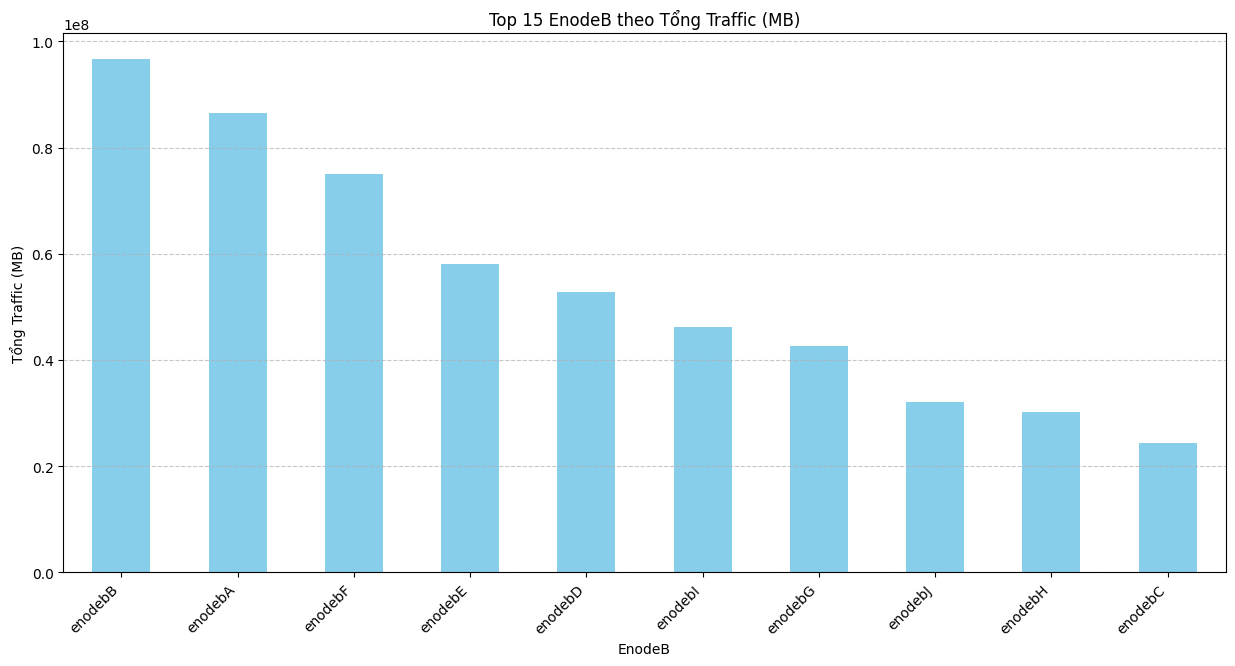


--- Top 20 Cell theo Tổng Traffic ---
cell_name
enodebB9           22053559.64
enodebB7           16631287.02
enodebB1           16470167.89
enodebH1           14614787.19
enodebE51B281      14331893.81
enodebD1           14050112.07
enodebA1111B031    13895023.52
enodebI7           13361725.02
enodebJ1           12557627.19
enodebG3           11320693.38
enodebF31B011      11140388.65
enodebA1131B281    11055655.20
enodebF1           10964956.85
enodebA1131B011    10502379.94
enodebE3           10201187.15
enodebF2           10146383.63
enodebE2            9840357.97
enodebB3            9069488.69
enodebA1111B011     8867817.51
enodebI3            8684137.02
Name: ps_traffic_mb, dtype: float64


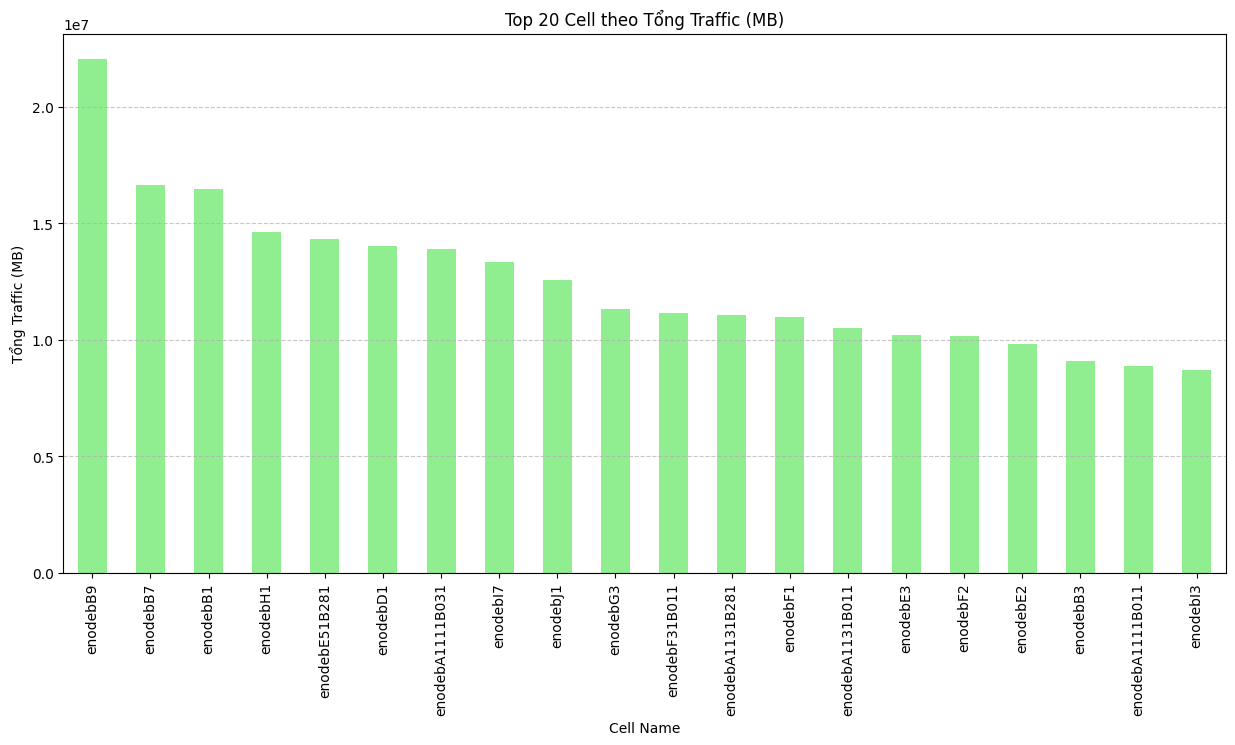

In [16]:

# --- Cell 6: Phân tích theo hạng mục (EnodeB và Cell) ---
if 'df' in locals():
    print("Phân tích Top EnodeB và Cell...")
    # 1. Top EnodeBs theo tổng lưu lượng
    top_n = 15
    df_enodeb_traffic = df.groupby('enodeb')['ps_traffic_mb'].sum().sort_values(ascending=False)
    
    print(f"\n--- Top {top_n} EnodeB theo Tổng Traffic ---")
    print(df_enodeb_traffic.head(top_n))

    # Vẽ biểu đồ bar cho Top EnodeB
    plt.figure(figsize=(15, 7))
    df_enodeb_traffic.head(top_n).plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} EnodeB theo Tổng Traffic (MB)')
    plt.ylabel('Tổng Traffic (MB)')
    plt.xlabel('EnodeB')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.savefig('top_enodeb_traffic.png')
    plt.show()
    # 2. Top Cells theo tổng lưu lượng
    top_n_cells = 20
    df_cell_traffic = df.groupby('cell_name')['ps_traffic_mb'].sum().sort_values(ascending=False)

    print(f"\n--- Top {top_n_cells} Cell theo Tổng Traffic ---")
    print(df_cell_traffic.head(top_n_cells))
    
    # Vẽ biểu đồ bar cho Top Cell
    plt.figure(figsize=(15, 7))
    df_cell_traffic.head(top_n_cells).plot(kind='bar', color='lightgreen')
    plt.title(f'Top {top_n_cells} Cell theo Tổng Traffic (MB)')
    plt.ylabel('Tổng Traffic (MB)')
    plt.xlabel('Cell Name')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.savefig('top_cell_traffic.png')
    plt.show()

# %%

Phân tích mối tương quan giữa các KPI...

--- Ma trận tương quan ---
                        ps_traffic_mb  avg_rrc_connected_user  prb_dl_used  prb_utilization  prb_dl_available_total
ps_traffic_mb                1.000000                0.823292     0.830809         0.829545                0.240257
avg_rrc_connected_user       0.823292                1.000000     0.729883         0.729911                0.265494
prb_dl_used                  0.830809                0.729883     1.000000         0.999457                0.269604
prb_utilization              0.829545                0.729911     0.999457         1.000000                0.268437
prb_dl_available_total       0.240257                0.265494     0.269604         0.268437                1.000000


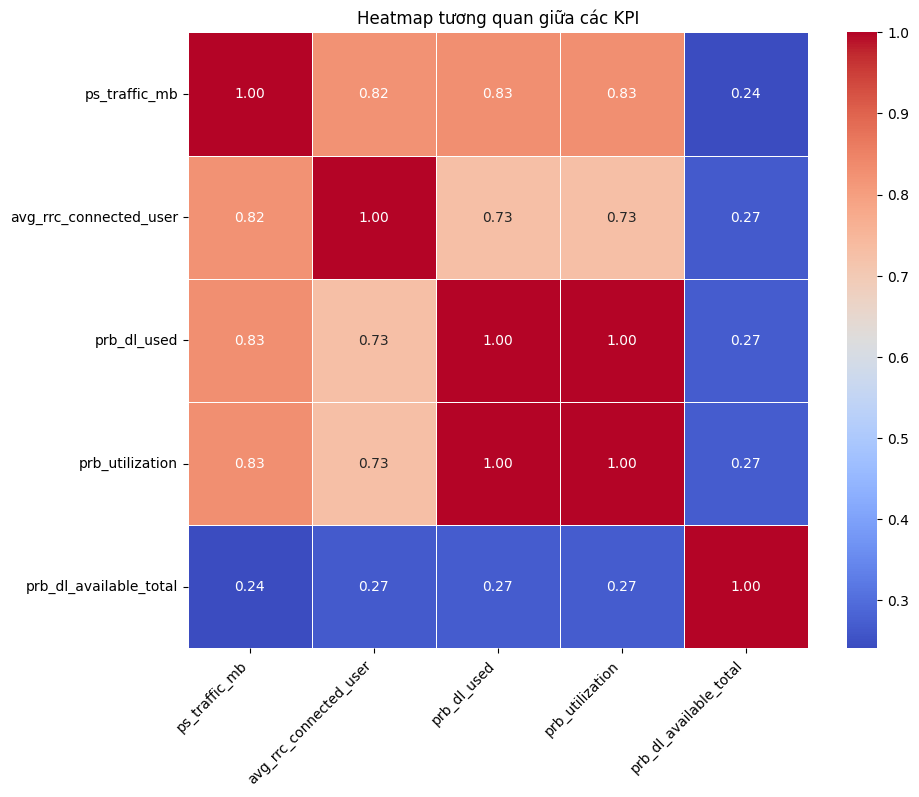

In [17]:

# --- Cell 7: Phân tích mối tương quan (Correlation) ---
if 'df' in locals():
    print("Phân tích mối tương quan giữa các KPI...")
    
    # Chọn các cột số để tính tương quan
    numeric_cols = ['ps_traffic_mb', 'avg_rrc_connected_user', 'prb_dl_used', 'prb_utilization', 'prb_dl_available_total']
    
    # Tính ma trận tương quan
    correlation_matrix = df[numeric_cols].corr()
    
    print("\n--- Ma trận tương quan ---")
    print(correlation_matrix)
    
    # Vẽ Heatmap (Bản đồ nhiệt)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Heatmap tương quan giữa các KPI')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    # plt.savefig('kpi_correlation_heatmap.png')
    plt.show()
    
    # Giải thích nhanh:
    # - Giá trị gần +1.0: Tương quan thuận mạnh (ví dụ: Traffic tăng thì Users cũng tăng)
    # - Giá trị gần -1.0: Tương quan nghịch mạnh
    # - Giá trị gần 0: Không có tương quan tuyến tính

# %%

Phân tích xu hướng trung bình theo giờ trong ngày...

--- KPI trung bình theo giờ trong ngày ---
             ps_traffic_mb  avg_rrc_connected_user  prb_utilization
hour_of_day                                                        
0             27291.123628                8.462650       740.300791
1             53188.640354                6.408190       530.046176
2             40890.345575                5.961046       491.265245
3             35855.463894                5.806407       482.217011
4             43420.167876                6.281514       506.514084
5             98924.829643                9.001040       742.553459
6            152804.096549               12.982799      1093.428249
7            186079.492566               15.378346      1268.077735
8            218547.736195               17.345731      1474.868410
9            240252.118053               17.980544      1617.089230
10           244840.921404               17.790268      1675.342029
11           269040

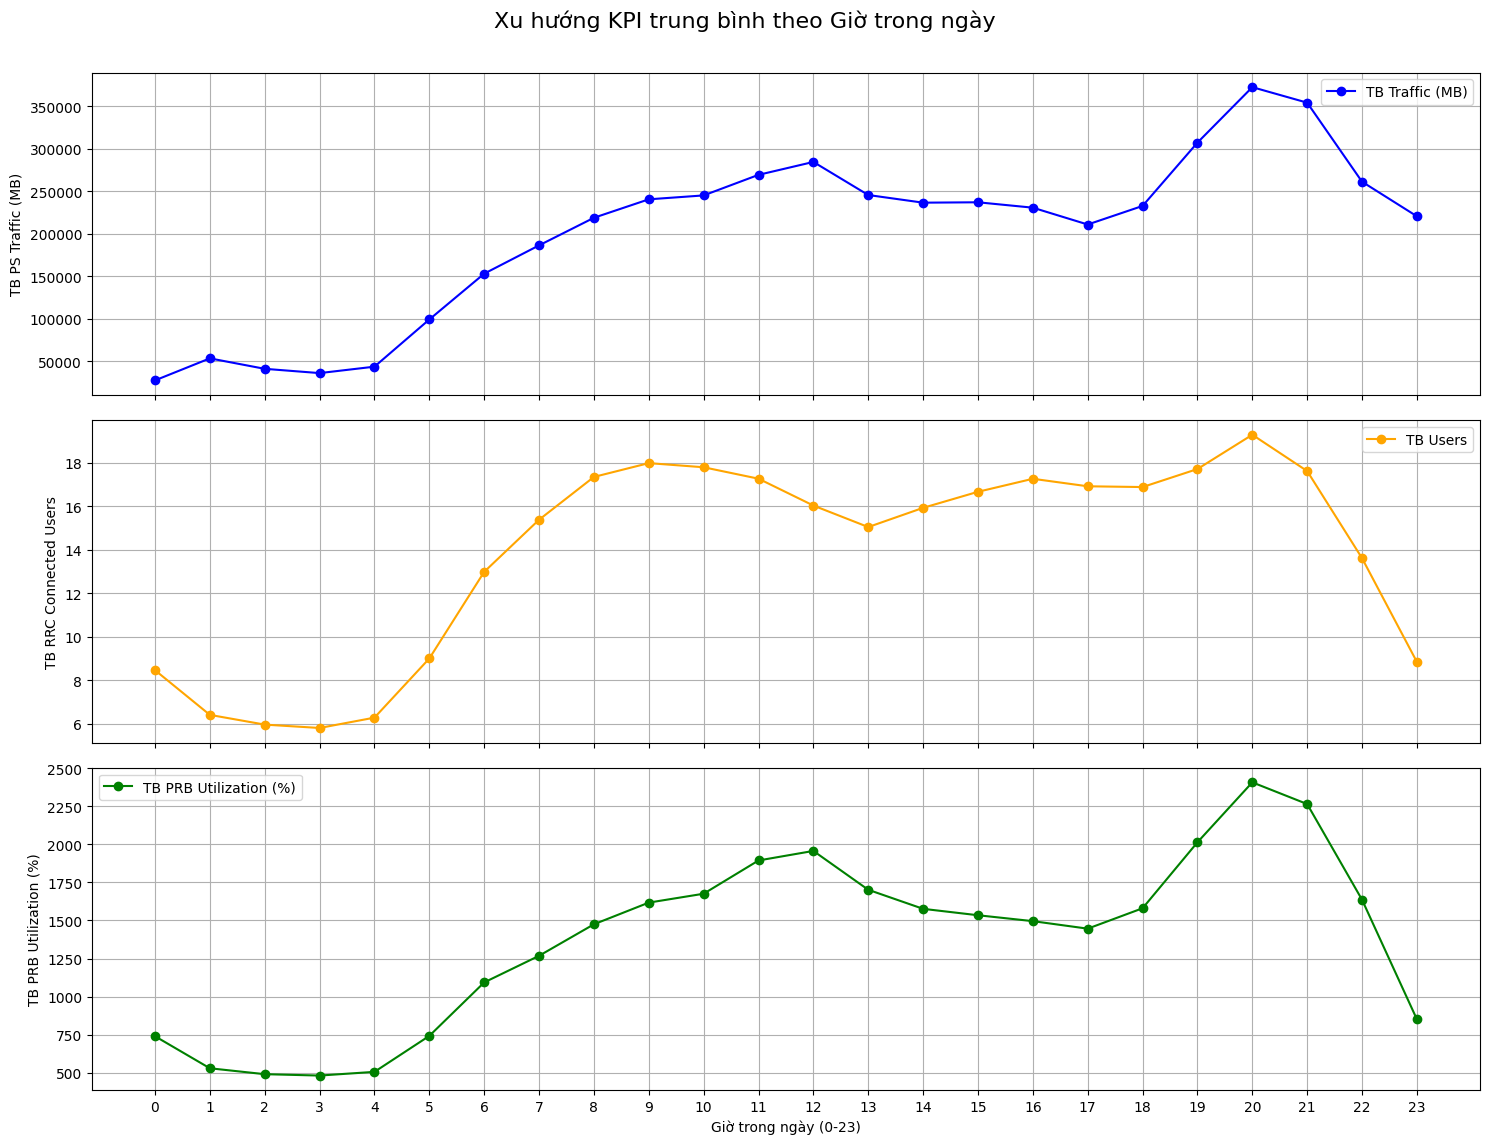

In [18]:

# --- Cell 8: Phân tích theo giờ trong ngày (Hour of Day) ---
# Giúp xác định giờ cao điểm (peak hours)
if 'df_hourly' in locals():
    print("Phân tích xu hướng trung bình theo giờ trong ngày...")

    # Thêm cột 'hour_of_day' vào df_hourly
    df_hourly['hour_of_day'] = df_hourly.index.hour
    
    # Tính trung bình các KPI cho mỗi giờ trong ngày (0-23)
    df_hod_avg = df_hourly.groupby('hour_of_day').mean()
    
    print("\n--- KPI trung bình theo giờ trong ngày ---")
    print(df_hod_avg[['ps_traffic_mb', 'avg_rrc_connected_user', 'prb_utilization']])

    # Vẽ biểu đồ đường
    fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
    fig.suptitle('Xu hướng KPI trung bình theo Giờ trong ngày', fontsize=16)
    
    # Các giờ trong ngày
    hours = df_hod_avg.index
    
    # Biểu đồ 1: Traffic
    axes[0].plot(hours, df_hod_avg['ps_traffic_mb'], label='TB Traffic (MB)', color='blue', marker='o')
    axes[0].set_ylabel('TB PS Traffic (MB)')
    axes[0].legend()
    axes[0].grid(True)

    # Biểu đồ 2: Users
    axes[1].plot(hours, df_hod_avg['avg_rrc_connected_user'], label='TB Users', color='orange', marker='o')
    axes[1].set_ylabel('TB RRC Connected Users')
    axes[1].legend()
    axes[1].grid(True)

    # Biểu đồ 3: PRB Utilization
    axes[2].plot(hours, df_hod_avg['prb_utilization'], label='TB PRB Utilization (%)', color='green', marker='o')
    axes[2].set_ylabel('TB PRB Utilization (%)')
    axes[2].set_xlabel('Giờ trong ngày (0-23)')
    axes[2].legend()
    axes[2].grid(True)
    
    # Đảm bảo trục x hiển thị tất cả các giờ
    plt.xticks(hours)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    # plt.savefig('kpi_hourly_avg_trend.png')
    plt.show()

# Notebook này đã cung cấp các bước cơ bản để:
# 1. Tải và làm sạch dữ liệu.
# 2. Tạo cột `timestamp` và chỉ số `prb_utilization`.
# 3. Trực quan hóa xu hướng theo thời gian.
# 4. Xác định các EnodeB/Cell hàng đầu.
# 5. Phân tích tương quan và xu hướng theo giờ trong ngày.

Bắt đầu phân tích EnodeB chi tiết...
(EnodeB có nhiều mẫu nhất được chọn làm ví dụ: enodebB)
--- Đang phân tích cho: enodebB ---

[Yêu cầu 1] EnodeB 'enodebB' có tổng cộng 22 cell độc nhất.
   (Ví dụ 10 cell đầu tiên):
['enodebB12B031' 'enodebB11B071' 'enodebB1' 'enodebB9' 'enodebB7'
 'enodebB12B072' 'enodebB8' 'enodebB12B073' 'enodebB31B281'
 'enodebB21B281']

[Yêu cầu 2] Thống kê số lượng mẫu (bản ghi 15 phút) cho mỗi cell thuộc 'enodebB':
cell_name
enodebB1         9907
enodebB11B032    1155
enodebB11B071    9907
enodebB11B072    9906
enodebB11B073    9918
enodebB11B074    9915
enodebB12B011    9914
enodebB12B031    9911
enodebB12B032    1154
enodebB12B071    9908
enodebB12B072    9902
enodebB12B073    9904
enodebB12B074    9900
enodebB2         9905
enodebB21B032    1148
enodebB21B281    9918
enodebB3         9912
enodebB31B032    1148
enodebB31B281    9912
enodebB7         9906
enodebB8         9905
enodebB9         9907
Name: count, dtype: int64

Đang vẽ biểu đồ số lượng mẫu...


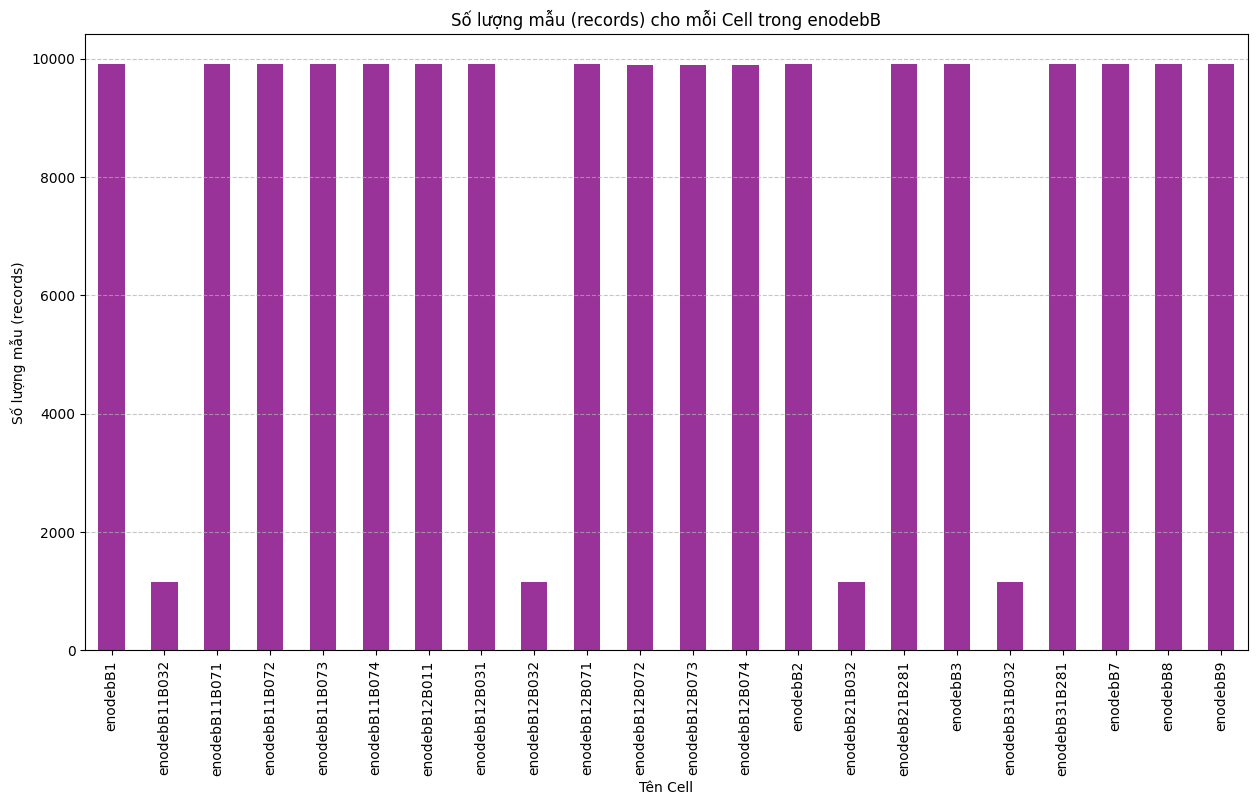

In [19]:
# %%
# --- Cell 9: Phân tích chi tiết một EnodeB ---

if 'df' in locals():
    print("Bắt đầu phân tích EnodeB chi tiết...")

    # --- BƯỚC 1: Chọn một EnodeB ---
    # Tự động chọn EnodeB có nhiều mẫu (rows) nhất để làm ví dụ
    # Bạn có thể THAY ĐỔI giá trị 'selected_enodeb' thành bất kỳ EnodeB nào bạn muốn xem
    try:
        default_enodeb = df['enodeb'].value_counts().idxmax()
        print(f"(EnodeB có nhiều mẫu nhất được chọn làm ví dụ: {default_enodeb})")
    except Exception:
        # Dự phòng nếu df rỗng
        default_enodeb = df['enodeb'].iloc[0] 

    # *** THAY ĐỔI TÊN ENODEB BẠN MUỐN XEM TẠI ĐÂY ***
    selected_enodeb = default_enodeb 
    # Ví dụ: selected_enodeb = 'EnodebA'
    
    print(f"--- Đang phân tích cho: {selected_enodeb} ---")

    # Lọc DataFrame để chỉ lấy dữ liệu cho EnodeB đã chọn
    df_specific_enodeb = df[df['enodeb'] == selected_enodeb]

    if df_specific_enodeb.empty:
        print(f"LỖI: Không tìm thấy dữ liệu cho EnodeB '{selected_enodeb}'.")
    else:
        # --- Yêu cầu 1: Một EnodeB có bao nhiêu cell ---
        unique_cells = df_specific_enodeb['cell_name'].unique()
        num_unique_cells = len(unique_cells)

        print(f"\n[Yêu cầu 1] EnodeB '{selected_enodeb}' có tổng cộng {num_unique_cells} cell độc nhất.")
        
        # In ra 10 cell đầu tiên làm ví dụ
        if num_unique_cells > 10:
            print("   (Ví dụ 10 cell đầu tiên):")
            print(unique_cells[:10])
        else:
            print("   (Danh sách các cell):")
            print(unique_cells)


        # --- Yêu cầu 2: Mỗi cell có bao nhiêu mẫu ---
        print(f"\n[Yêu cầu 2] Thống kê số lượng mẫu (bản ghi 15 phút) cho mỗi cell thuộc '{selected_enodeb}':")
        
        # Sắp xếp theo tên cell (alphabetical)
        cell_sample_counts = df_specific_enodeb['cell_name'].value_counts().sort_index() 
        
        # In ra kết quả
        print(cell_sample_counts)

        # Trực quan hóa (nếu số lượng cell không quá lớn)
        if num_unique_cells > 1 and num_unique_cells <= 50: # Không vẽ biểu đồ nếu có quá nhiều cell
            print("\nĐang vẽ biểu đồ số lượng mẫu...")
            plt.figure(figsize=(15, 8))
            cell_sample_counts.plot(kind='bar', color='purple', alpha=0.8)
            plt.title(f"Số lượng mẫu (records) cho mỗi Cell trong {selected_enodeb}")
            plt.ylabel("Số lượng mẫu (records)")
            plt.xlabel("Tên Cell")
            plt.xticks(rotation=90)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
        elif num_unique_cells > 50:
             print("\n(Bỏ qua vẽ biểu đồ vì số lượng cell > 50, quá nhiều để hiển thị)")
else:
    print("Lỗi: DataFrame 'df' không tồn tại. Vui lòng chạy lại các cell trước.")

In [20]:
# %%
# --- Cell 11 (Phiên bản CSV): Lưu dữ liệu đã xử lý ---
# Lưu DataFrame 'df' đã được làm sạch và xử lý
# vào một file .csv.

output_filename_csv = 'kpi_processed.csv'

if 'df' in locals() and not df.empty:
    try:
        # Lệnh df.to_csv() sẽ tự động lưu cột index (timestamp của bạn)
        # làm cột đầu tiên trong file CSV.
        df.to_csv(output_filename_csv)
        
        print(f"Đã lưu DataFrame đã xử lý thành công vào file: '{output_filename_csv}'")
        print(f"Tổng cộng {len(df)} dòng dữ liệu đã được lưu.")
        
        # --- (Phiên bản Parquet bị vô hiệu hóa) ---
        # output_filename_parquet = 'kpi_processed.parquet'
        # df.to_parquet(output_filename_parquet, engine='pyarrow')
        # print(f"Đã lưu (dạng Parquet) vào '{output_filename_parquet}'")

    except Exception as e:
        print(f"Đã xảy ra lỗi khi lưu file: {e}")
else:
    print("Lỗi: DataFrame 'df' không tồn tại hoặc bị rỗng. Không thể lưu file.")

Đã lưu DataFrame đã xử lý thành công vào file: 'kpi_processed.csv'
Tổng cộng 1048575 dòng dữ liệu đã được lưu.
